In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('melb_data.csv')

In [45]:
df.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13333,Yarraville,18 Stewart St,3,h,1455000.0,S,Village,23/09/2017,6.3,3013.0,...,2.0,2.0,351.0,125.0,1910.0,NaN,-37.81111,144.88759,Western Metropolitan,6543.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
8035,Kew,7 Molesworth St,5,h,3160000.0,S,Marshall,13/05/2017,5.6,3101.0,...,5.0,2.0,811.0,NaN,NaN,Boroondara,-37.80130,145.02800,Southern Metropolitan,10331.0
1441,Brunswick West,8/109 Melville Rd,2,u,370000.0,VB,Nelson,24/09/2016,5.9,3055.0,...,1.0,1.0,0.0,65.0,1970.0,Moreland,-37.76060,144.94430,Northern Metropolitan,7082.0
7261,West Footscray,9/24 Dongola Rd,3,h,900000.0,S,Jas,24/09/2016,8.2,3012.0,...,2.0,3.0,446.0,NaN,2006.0,Maribyrnong,-37.79230,144.88140,Western Metropolitan,5058.0
4192,Moorabbin,77 Chapel Rd,3,h,920000.0,S,hockingstuart,28/05/2016,14.6,3189.0,...,1.0,1.0,653.0,NaN,NaN,Kingston,-37.93920,145.04810,Southern Metropolitan,2555.0
3936,Maribyrnong,42/2 Horizon Dr,2,u,488000.0,S,Barry,16/04/2016,8.7,3032.0,...,2.0,2.0,0.0,NaN,NaN,Maribyrnong,-37.77520,144.89250,Western Metropolitan,4918.0
4710,Port Melbourne,802/127 Beach St,2,u,1250000.0,VB,hockingstuart,4/03/2017,3.8,3207.0,...,2.0,2.0,0.0,NaN,NaN,Port Phillip,-37.83990,144.92870,Southern Metropolitan,8648.0
2144,Doncaster,5/333 George St,3,u,772000.0,S,Barry,10/12/2016,13.9,3108.0,...,2.0,1.0,203.0,109.0,1986.0,Manningham,-37.77760,145.12670,Eastern Metropolitan,9028.0
814,Bentleigh East,9/7 Derry St,2,u,380000.0,PI,Buxton,7/05/2016,13.9,3165.0,...,2.0,1.0,0.0,78.0,1970.0,Glen Eira,-37.92120,145.06740,Southern Metropolitan,10969.0


Anda adalah seorang Data Scientist di sebuah perusahaan real estate di Melbourne. Anda diberikan dataset tentang harga rumah berbagai tipe di Melbourne beserta variabel-variabel terkait rumah seperti jumlah kamar, luas tanah, metode penjualan, dan lainnya.

Data ini adalah cuplikan data yang dibuat oleh Tony Pino. Data harga rumah ini merupakan hasil web scrapping dari data yang terpublikasikan untuk publik melalui Domain.com.au.

Informasi mengenai keterangan variabel (features) dan apabila Anda kesulitan download dataset pada repo ini, Anda bisa akses Kaggle

Soal: Buatlah sebuah file notebook (EDA_HouseMarket.ipynb) dan ikuti panduan Exploratory Data Analysis berikut:

1. Untuk feature/column `Landsize & Price`, hitung dan beri penjelasan (insight) terkait:

- Titik Pusat Data (Central Tendency)
- Persebaran Data (Dispersion)
- Distribusi Data (Distribution)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [6]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [7]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [11]:
df.describe()['Landsize']

count     13580.000000
mean        558.416127
std        3990.669241
min           0.000000
25%         177.000000
50%         440.000000
75%         651.000000
max      433014.000000
Name: Landsize, dtype: float64

In [14]:
df.describe()['Price']

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

In [17]:
dfLandPrice = df[['Price', 'Landsize']]
dfLandPrice

,Price,Landsize
0,1480000.0,202.0
1,1035000.0,156.0
2,1465000.0,134.0
3,850000.0,94.0
4,1600000.0,120.0
...,...,...
13575,1245000.0,652.0
13576,1031000.0,333.0
13577,1170000.0,436.0
13578,2500000.0,866.0


In [18]:
dfLandPrice.describe()

,Price,Landsize
count,1.358000e+04,13580.000000
mean,1.075684e+06,558.416127
std,6.393107e+05,3990.669241
min,8.500000e+04,0.000000
25%,6.500000e+05,177.000000
50%,9.030000e+05,440.000000
75%,1.330000e+06,651.000000
max,9.000000e+06,433014.000000


In [20]:
stats = pd.DataFrame()
stats["mean"]=dfLandPrice.mean()
stats["Std.Dev"]=dfLandPrice.std()
stats["Var"]=dfLandPrice.var()
stats

,mean,Std.Dev,Var
Price,1.075684e+06,639310.724296,4.087182e+11
Landsize,5.584161e+02,3990.669241,1.592544e+07


In [21]:
columns = dfLandPrice.columns.tolist()
columns

['Price', 'Landsize']

In [24]:
dataStats = []

for i in dfLandPrice.columns:
    dataStats.append([
        i,
        dfLandPrice[i].mean(),
        dfLandPrice[i].median(),
        dfLandPrice[i].mode(),
        dfLandPrice[i].max()-df[i].min(),
        dfLandPrice[i].quantile(.25),
        dfLandPrice[i].quantile(.75),
        dfLandPrice[i].quantile(.75)-df[i].quantile(.25),
        dfLandPrice[i].std(),
        dfLandPrice[i].var()
    ])

In [25]:
dataStats = pd.DataFrame(dataStats, columns=[
    'Data Features',
    'Mean',
    'Median',
    'Mode',
    'Range',
    'Q1',
    'Q3',
    'IQR',
    'Std',
    'Var'
])

In [26]:
dataStats

,Data Features,Mean,Median,Mode,Range,Q1,Q3,IQR,Std,Var
0,Price,1.075684e+06,903000.0,0 1100000.0 dtype: float64,8915000.0,650000.0,1330000.0,680000.0,639310.724296,4.087182e+11
1,Landsize,5.584161e+02,440.0,0 0.0 dtype: float64,433014.0,177.0,651.0,474.0,3990.669241,1.592544e+07


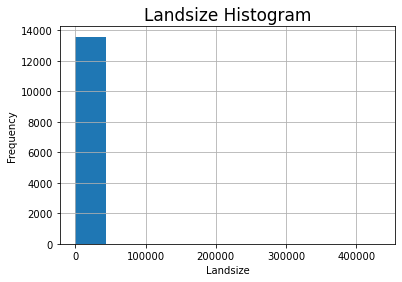

In [98]:
plt.hist(df['Landsize'])                   # Panggil fungsi histogram  dan gunakan data tips variabel total_bill
plt.title('Landsize Histogram', size=17)     # judul grafik
plt.xlabel("Landsize")                       # label di garis X
plt.ylabel("Frequency")                        # label di garis Y
plt.grid(True)
plt.show()

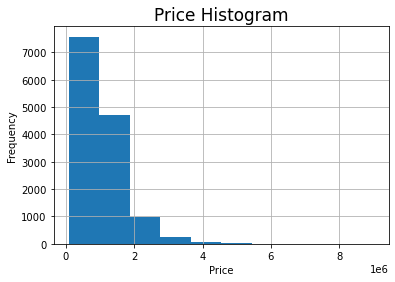

In [99]:
plt.hist(df['Price'])                   # Panggil fungsi histogram  dan gunakan data tips variabel total_bill
plt.title('Price Histogram', size=17)     # judul grafik
plt.xlabel("Price")                       # label di garis X
plt.ylabel("Frequency")                        # label di garis Y
plt.grid(True)
plt.show()

In [79]:
dataStats.set_index('Data Features')

,Mean,Median,Mode,Range,Q1,Q3,IQR,Std,Var
Data Features,,,,,,,,,
Price,1.075684e+06,903000.0,0 1100000.0 dtype: float64,8915000.0,650000.0,1330000.0,680000.0,639310.724296,4.087182e+11
Landsize,5.584161e+02,440.0,0 0.0 dtype: float64,433014.0,177.0,651.0,474.0,3990.669241,1.592544e+07


2. Carilah data outlier dan beri penjelasan (insight) pada `feature/column Distance` ! Tambahkan plot untuk menampilkan adanya data `outlier`!

In [28]:
# Distance
Q1 = df.describe()['Distance']['25%']
Q3 = df.describe()['Distance']['75%']

In [29]:
IQR = Q3 - Q1

In [30]:
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


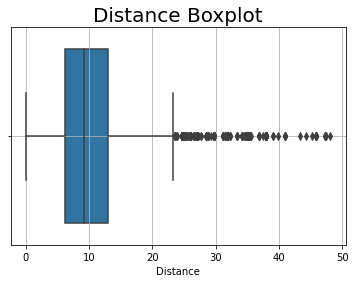

In [217]:
### Data Outliers
# df[(df['Distance'] < Lower_Fence)]
df[(df['Distance'] < Lower_Fence) | (df['Distance'] > Upper_Fence)]

sns.boxplot(df['Distance'])
plt.title('Distance Boxplot',size=20)
plt.grid(True)
plt.show()

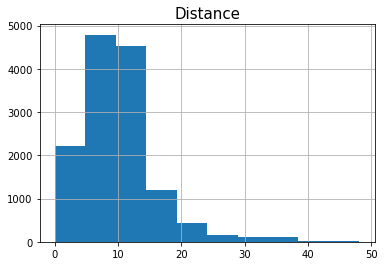

In [101]:
plt.hist(df['Distance'])                   
plt.title('Distance', size=15)                            
plt.grid(True)
plt.show()

Berdasarkan data distance, dapat dilihat bahwa persebaran data berada di sekitar 6 sampai 14

Terdapat outlier yang berada di atas upper fence dari data Distance, namun tidak ada outlier yang berada di lower fence dari data tersebut.
Semakin dekat jarak, maka akan menjadi keunggulan untuk rumah tesebut.

3. Tampilkan distribusi (sebaran data) dalam bentuk plot yang tepat, untuk feature/column YearBuilt. Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!

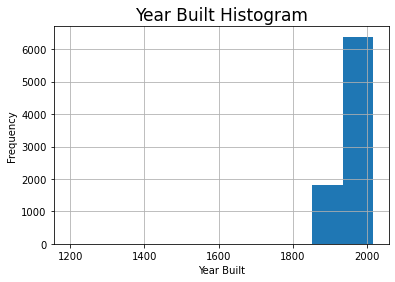

In [102]:
plt.hist(df['YearBuilt'])                   # Panggil fungsi histogram  dan gunakan data tips variabel total_bill
plt.title('Year Built Histogram', size=17)     # judul grafik
plt.xlabel("Year Built")                       # label di garis X
plt.ylabel("Frequency")                        # label di garis Y
plt.grid(True)
plt.show()

Dapat dilihat bahwa rumah yang dibangun pada tahun 1860an - 1940an ada sekitar 2000 unit, sedangkan pada tahun 1940an sampai 2018 sekitar 6300 unit.

4. Tampilkan perkembangan `rata-rata harga (price)` rumah berdasarkan `tahun pembangunan rumah (Year)` menggunakan plot yang tepat! Jelaskan (insight) perkembangan rata-rata harga rumah dari plot yang Anda buat!

In [118]:
dfrata = df[['YearBuilt', 'Price']].groupby(by=['YearBuilt'], as_index=False).mean().sort_values(by=['YearBuilt'], ascending=False)
dfrata

,YearBuilt,Price
143,2018.0,1.310000e+06
142,2017.0,1.037972e+06
141,2016.0,1.523655e+06
140,2015.0,1.231485e+06
139,2014.0,9.219150e+05
...,...,...
4,1856.0,2.260000e+06
3,1854.0,3.310000e+06
2,1850.0,1.179500e+06
1,1830.0,8.550000e+05


In [119]:
x = dfrata['YearBuilt']
y = dfrata['Price']

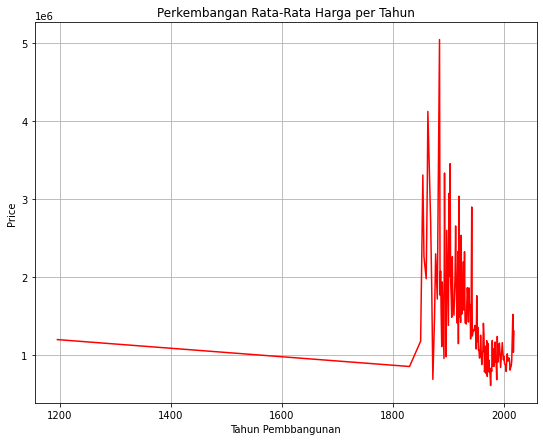

In [120]:
plt.figure(figsize=(9,7))
plt.plot(x,y,'red')
plt.title('Perkembangan Rata-Rata Harga per Tahun')
plt.xlabel("Tahun Pembbangunan")
plt.ylabel("Price")
plt.grid(True)
plt.show()

Perkembangan harga rata-rata rumah tidak dipengaruhi oleh tahun pembuatan rumah tersebut.

5. Di antara Landsize, Distance, & Rooms, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column Price? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk perusahaan setelah mengetahui nilai korelasi tersebut?

In [213]:
dfLDR = df[['Landsize', 'Distance', 'Rooms', 'Price']]
dfLDR

,Landsize,Distance,Rooms,Price
0,202.0,2.5,2,1480000.0
1,156.0,2.5,2,1035000.0
2,134.0,2.5,3,1465000.0
3,94.0,2.5,3,850000.0
4,120.0,2.5,4,1600000.0
...,...,...,...,...
13575,652.0,16.7,4,1245000.0
13576,333.0,6.8,3,1031000.0
13577,436.0,6.8,3,1170000.0
13578,866.0,6.8,4,2500000.0


In [214]:
# Pearson Corr
dfLDR.corr(method='pearson')

,Landsize,Distance,Rooms,Price
Landsize,1.000000,0.025004,0.025678,0.037507
Distance,0.025004,1.000000,0.294203,-0.162522
Rooms,0.025678,0.294203,1.000000,0.496634
Price,0.037507,-0.162522,0.496634,1.000000


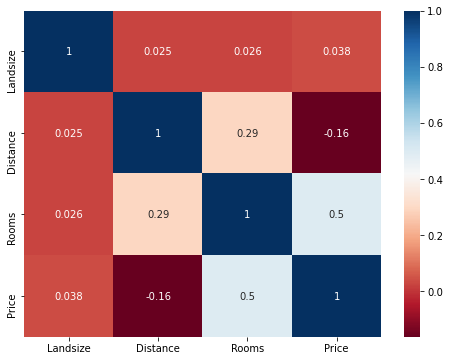

In [215]:
# Pearson correlation heatmap
plt.figure(figsize = (8,6))       
sns.heatmap(dfLDR.corr(method='pearson')             
            , annot = True        
            , cmap = 'RdBu')
plt.show()

Metode korelasi yang digunakan adalah Pearson Correlation. Korelasi Pearson digunakan untuk mengetahui hubungan antara 2 variabel, yaitu variabel bebas dan variabel terikat.
Searah artinya jika variabel bebas besar, variabel tergantung semakin besar. Jika menghasilkan angka negatif berarti hubungan bersifat tidak searah. Tidak searah artinya jika nilai variabel bebas besar, variabel tergantung semakin kecil

Berdasarkan data di atas, diketahui bahwa yang memiliki korelasi paling besar terhadap harga adalah Rooms, dilanjutkan dengan Landsize. Harga dengan jarak memiliki korelasi negatif.

6. Temukan RegionName yang rata-rata harga (Price) propertinya paling tinggi, serta tampilkan RegionName dan rata-rata harga rumah dalam bentuk Barplot! Lalu, di region yang memiliki rata-rata harga properti tertinggi, carilah:
- Lima CouncilArea yang memiliki rata-rata harga rumah tertinggi!
- Tipe properti (Type) yang memiliki rata-rata harga rumah tertinggi!
- Metode penjualan properti (Method) yang paling sering dilakukan!

In [173]:
# membuat data frame Council Area menjadi harga rata-rata
dfratatest = df[['Regionname', 'CouncilArea', 'Price']].groupby(by=['Regionname'], as_index=False).mean().sort_values(by=['Price'], ascending=True)

In [179]:
dftertinggi = dfratatest.tail(1)

In [163]:
dfratatest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 22 to 1
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CouncilArea  33 non-null     object 
 1   Price        33 non-null     float64
dtypes: float64(1), object(1)
memory usage: 792.0+ bytes


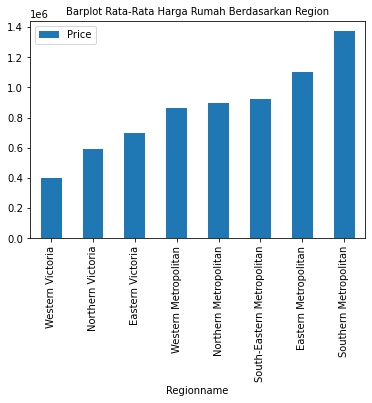

In [181]:
dfratatest.plot.bar(x='Regionname', y='Price')
plt.title('Barplot Rata-Rata Harga Rumah Berdasarkan Region', size=10)
plt.show()

In [183]:
dfCouncil = df[df['Regionname']=='Southern Metropolitan']

In [185]:
dfrataCouncil = dfCouncil[['CouncilArea', 'Price']].groupby(by=['CouncilArea'], as_index=False).mean().sort_values(by=['Price'], ascending=False)

In [186]:
dfrataCouncil

,CouncilArea,Price
0,Bayside,1.652168e+06
1,Boroondara,1.646740e+06
8,Unavailable,1.325000e+06
9,Whitehorse,1.297237e+06
7,Stonnington,1.293382e+06
6,Port Phillip,1.144346e+06
5,Monash,1.091499e+06
2,Glen Eira,1.069279e+06
3,Kingston,9.909647e+05
4,Melbourne,9.209085e+05


In [189]:
counciltertinggi = dfrataCouncil.head(5)


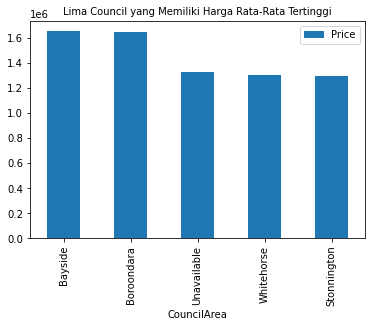

In [191]:
counciltertinggi.plot.bar(x='CouncilArea', y='Price')
plt.title('Lima Council yang Memiliki Harga Rata-Rata Tertinggi', size=10)
plt.show()

In [192]:
# Tipe Property
dfproperty = dfCouncil[['Type', 'Price']].groupby(by=['Type'], as_index=False).mean().sort_values(by=['Price'], ascending=True)

In [193]:
dfproperty

,Type,Price
2,u,6.648600e+05
1,t,1.205404e+06
0,h,1.802241e+06


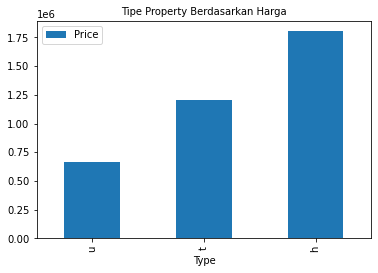

In [194]:
dfproperty.plot.bar(x='Type', y='Price')
plt.title('Tipe Property Berdasarkan Harga', size=10)
plt.show()

In [195]:
# Method
# Tipe Property
dfmethod = dfCouncil[['Method', 'Price']].groupby(by=['Method'], as_index=False).mean().sort_values(by=['Price'], ascending=True)

In [196]:
dfmethod

,Method,Price
3,SP,1.113544e+06
2,SA,1.310289e+06
1,S,1.385983e+06
0,PI,1.392811e+06
4,VB,1.455222e+06


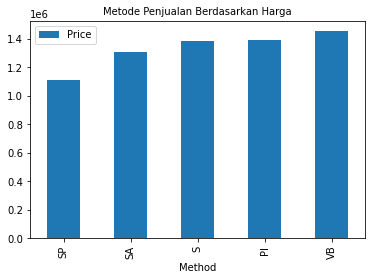

In [197]:
dfmethod.plot.bar(x='Method', y='Price')
plt.title('Metode Penjualan Berdasarkan Harga', size=10)
plt.show()

7. Lakukan Uji Hipotesis untuk menguji apakah ada perbedaan harga properti antar Region Name!

Di setiap visualisasi, penjelasan (insight) yang Anda sampaikan sebaiknya yang berhubungan dengan keuntungan/kerugian perusahaan real estate atau manfaat ke konsumen.

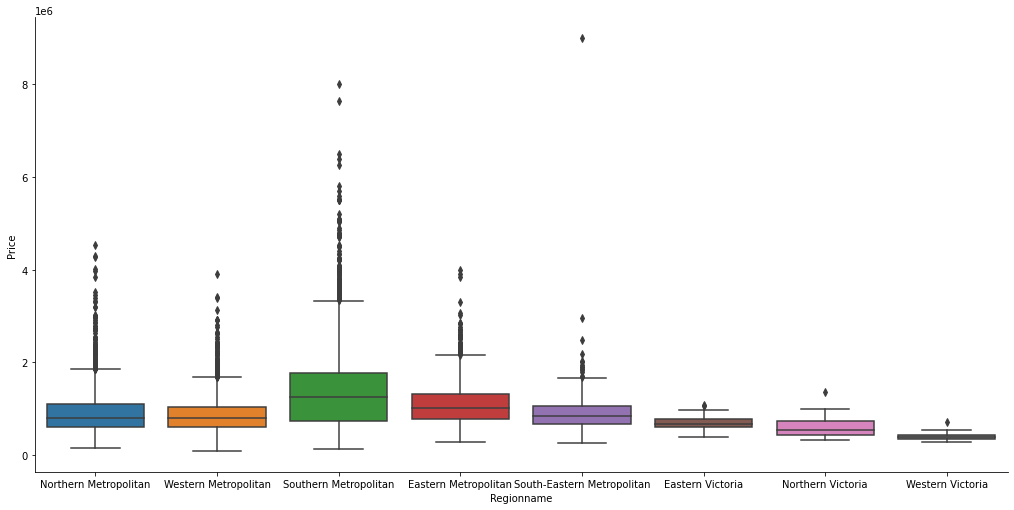

In [216]:
#Boxplot harga berdasarkan region
sns.catplot(x="Regionname", y="Price",
                data=df, kind="box",
                height=7, aspect=2);

Terdapat perbedaan harga antar Region Name. Perbedaan tersebut diakibatkan oleh perbedaan Rooms dan Landsize.
Hal tersebut menandakan bahwa semakin banyak rooms yang disediakan, maka harga rumah tersebut semakin tinggi.
